# Timeseries Workshop - 02 Air Pollutants Forecasting

In this notebook, we will analyse time series data on pollutant concentration.

## Dataset synopsis
* We will work with the Air Quality Dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+Quality).
* We'll limit ourselves to the the variables **relative humidity (RH)** and **CO concentration (CO_sensor)**.
* This dataset is particularly challenging because **timestamps are not equidistant**. 
* Entire days of recordings are missing, probably due to data collection failure. 
* There are also outliers wherever the sensors did not manage to obtain a measurement of humidity or CO concentration.

In [18]:
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from timeseries.data import load_air_quality

DATA_DIR = Path("..") / Path("data")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and process data

In [28]:
FILE_PATH = DATA_DIR / "air_quality.csv"

df = load_air_quality(FILE_PATH)
df.head()

,co_true,co_sensor,nmhc_true,c6h6_true,nmhc_sensor,nox_true,nox_sensor,no2_true,no2_sensor,o3_sensor,t,rh,ah
date_time,,,,,,,,,,,,,
2004-04-04 00:00:00,-200.0,1224.0,-200.0,7.8,892.0,-200.0,884.0,-200.0,1580.0,923.0,16.7,56.5,1.0634
2004-04-04 01:00:00,-200.0,1215.0,-200.0,6.7,843.0,-200.0,929.0,-200.0,1551.0,862.0,15.9,59.2,1.0635
2004-04-04 02:00:00,-200.0,1115.0,-200.0,5.4,782.0,-200.0,980.0,-200.0,1500.0,752.0,15.2,62.4,1.0726
2004-04-04 03:00:00,-200.0,1124.0,-200.0,5.6,793.0,-200.0,965.0,-200.0,1521.0,791.0,14.7,65.0,1.0766
2004-04-04 04:00:00,-200.0,1028.0,-200.0,3.5,682.0,-200.0,1090.0,-200.0,1448.0,697.0,14.3,65.3,1.0594


In [35]:
variables = ["co_sensor", "rh"]
df = df[variables]
df.head()

,co_sensor,rh
date_time,,
2004-04-04 00:00:00,1224.0,56.5
2004-04-04 01:00:00,1215.0,59.2
2004-04-04 02:00:00,1115.0,62.4
2004-04-04 03:00:00,1124.0,65.0
2004-04-04 04:00:00,1028.0,65.3


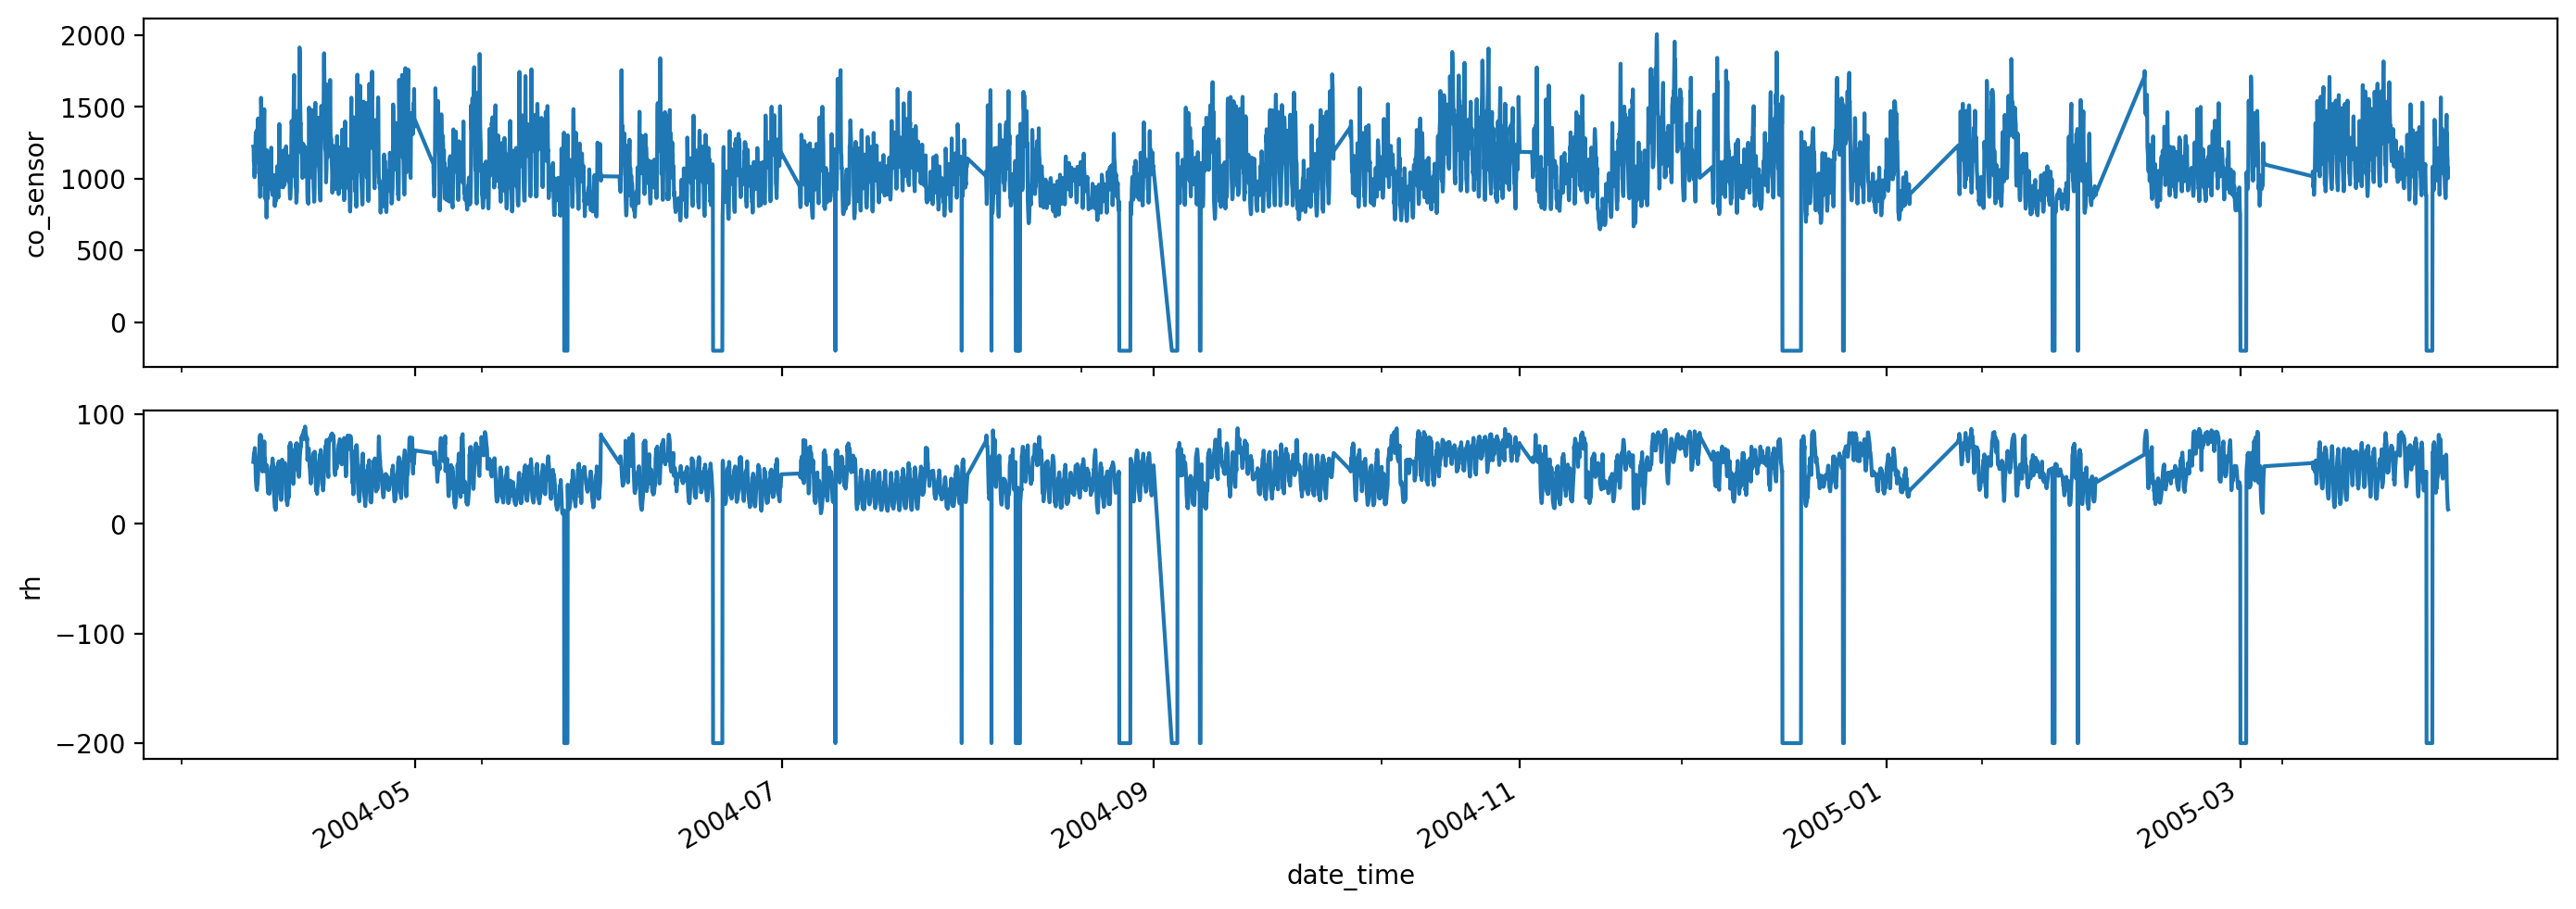

In [36]:
_, axs = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
for var, ax in zip(variables, axs):
    df[var].plot(ax=ax)
    ax.set_ylabel(var)
plt.tight_layout()

## Preprocessing
- There are records missing: pandas plot interpolates linearly between available values.
- Some values are negative, most likely measurement errors, as concentration or humidity level can't be negative.

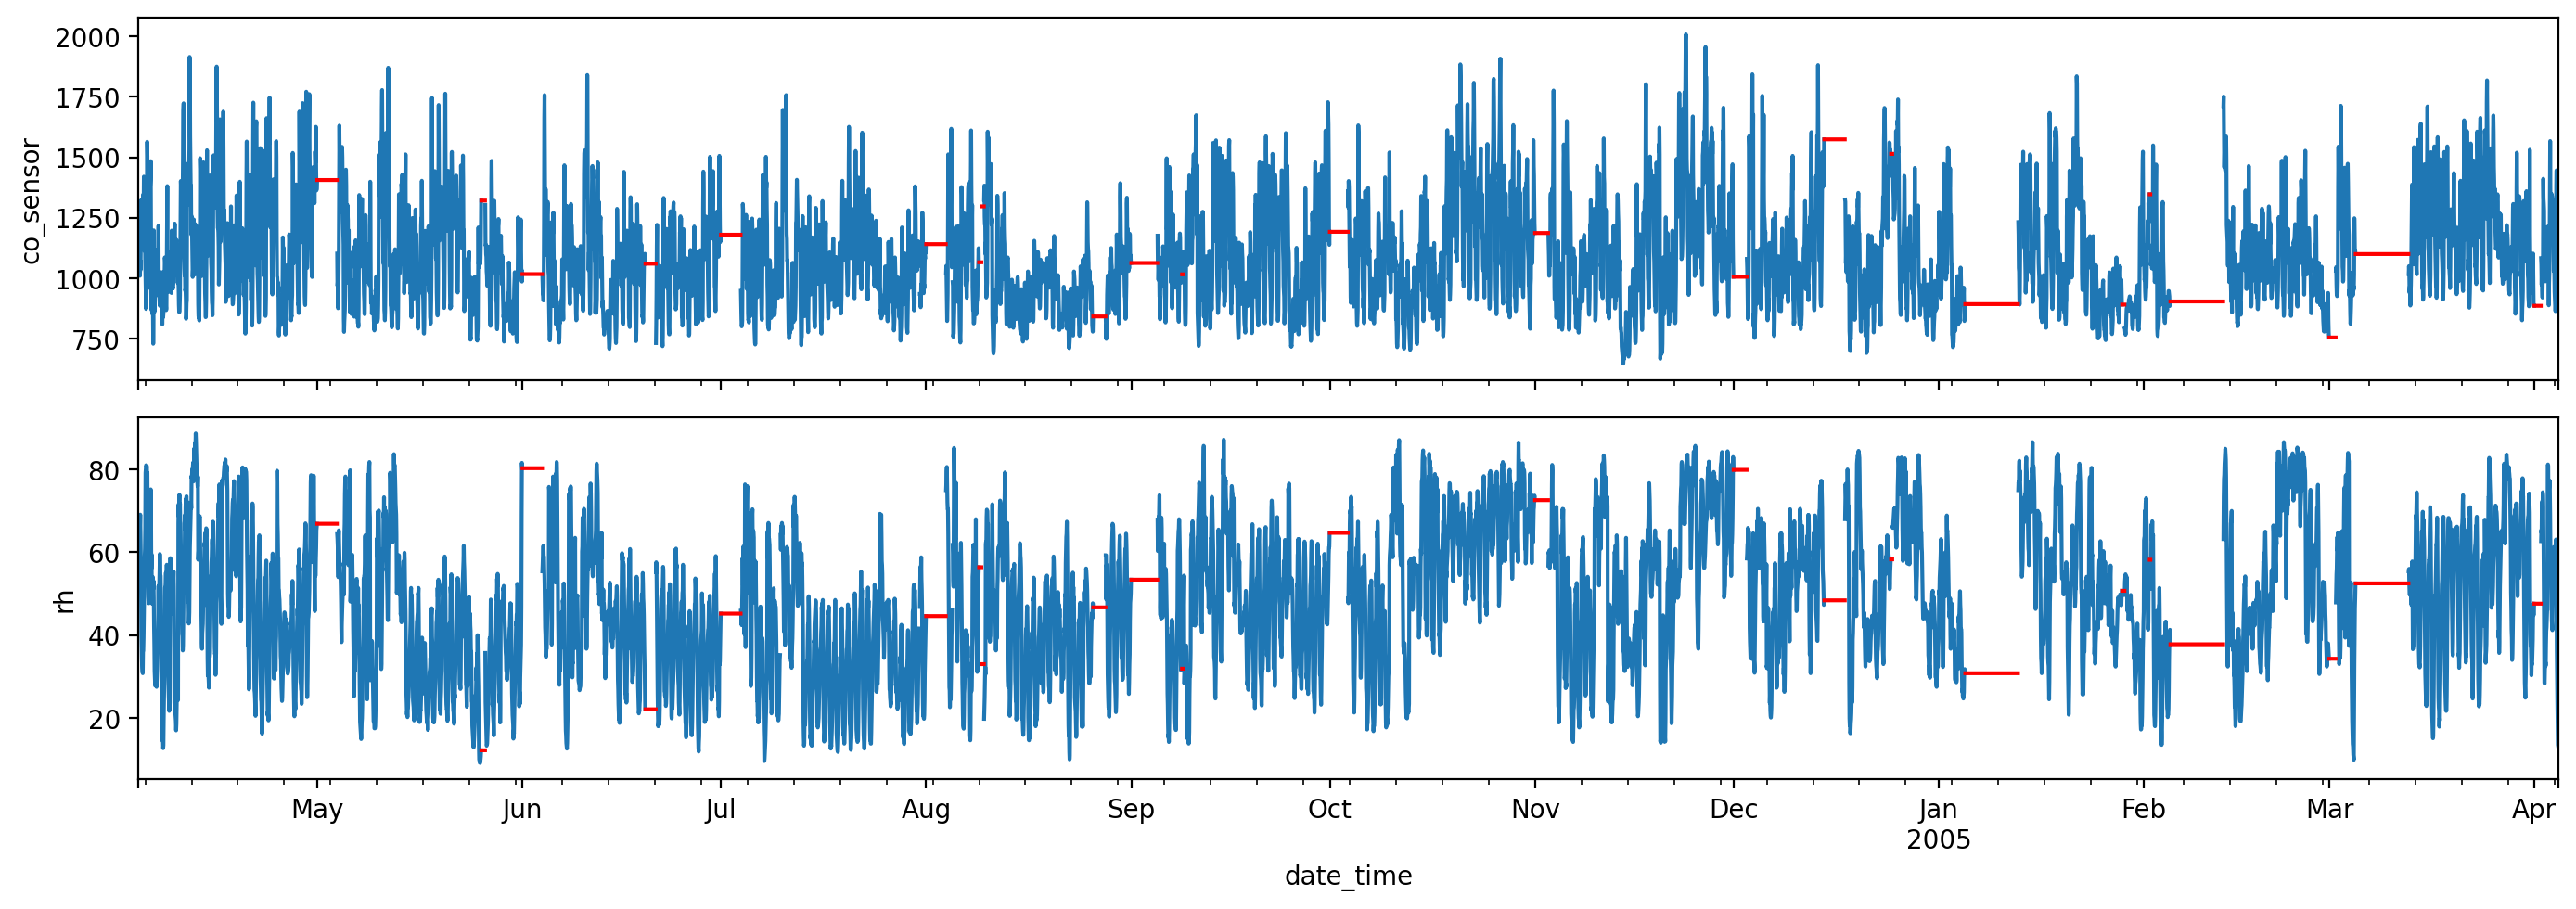

In [42]:
# Remove faulty values:
for var in variables:
    df = df[df[var] >= 0]

df_ = df.asfreq("1H")

# Apply the forward fill method.
df_imputed = df_.fillna(method="ffill")

_, axs = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
for var, ax in zip(variables, axs):
    df_[var].plot(ax=ax, marker="none")
    df_imputed[df_.isnull()][var].plot(ax=ax, legend=None, color="r")
    ax.set_ylabel(var)
plt.tight_layout()

## Seasonality

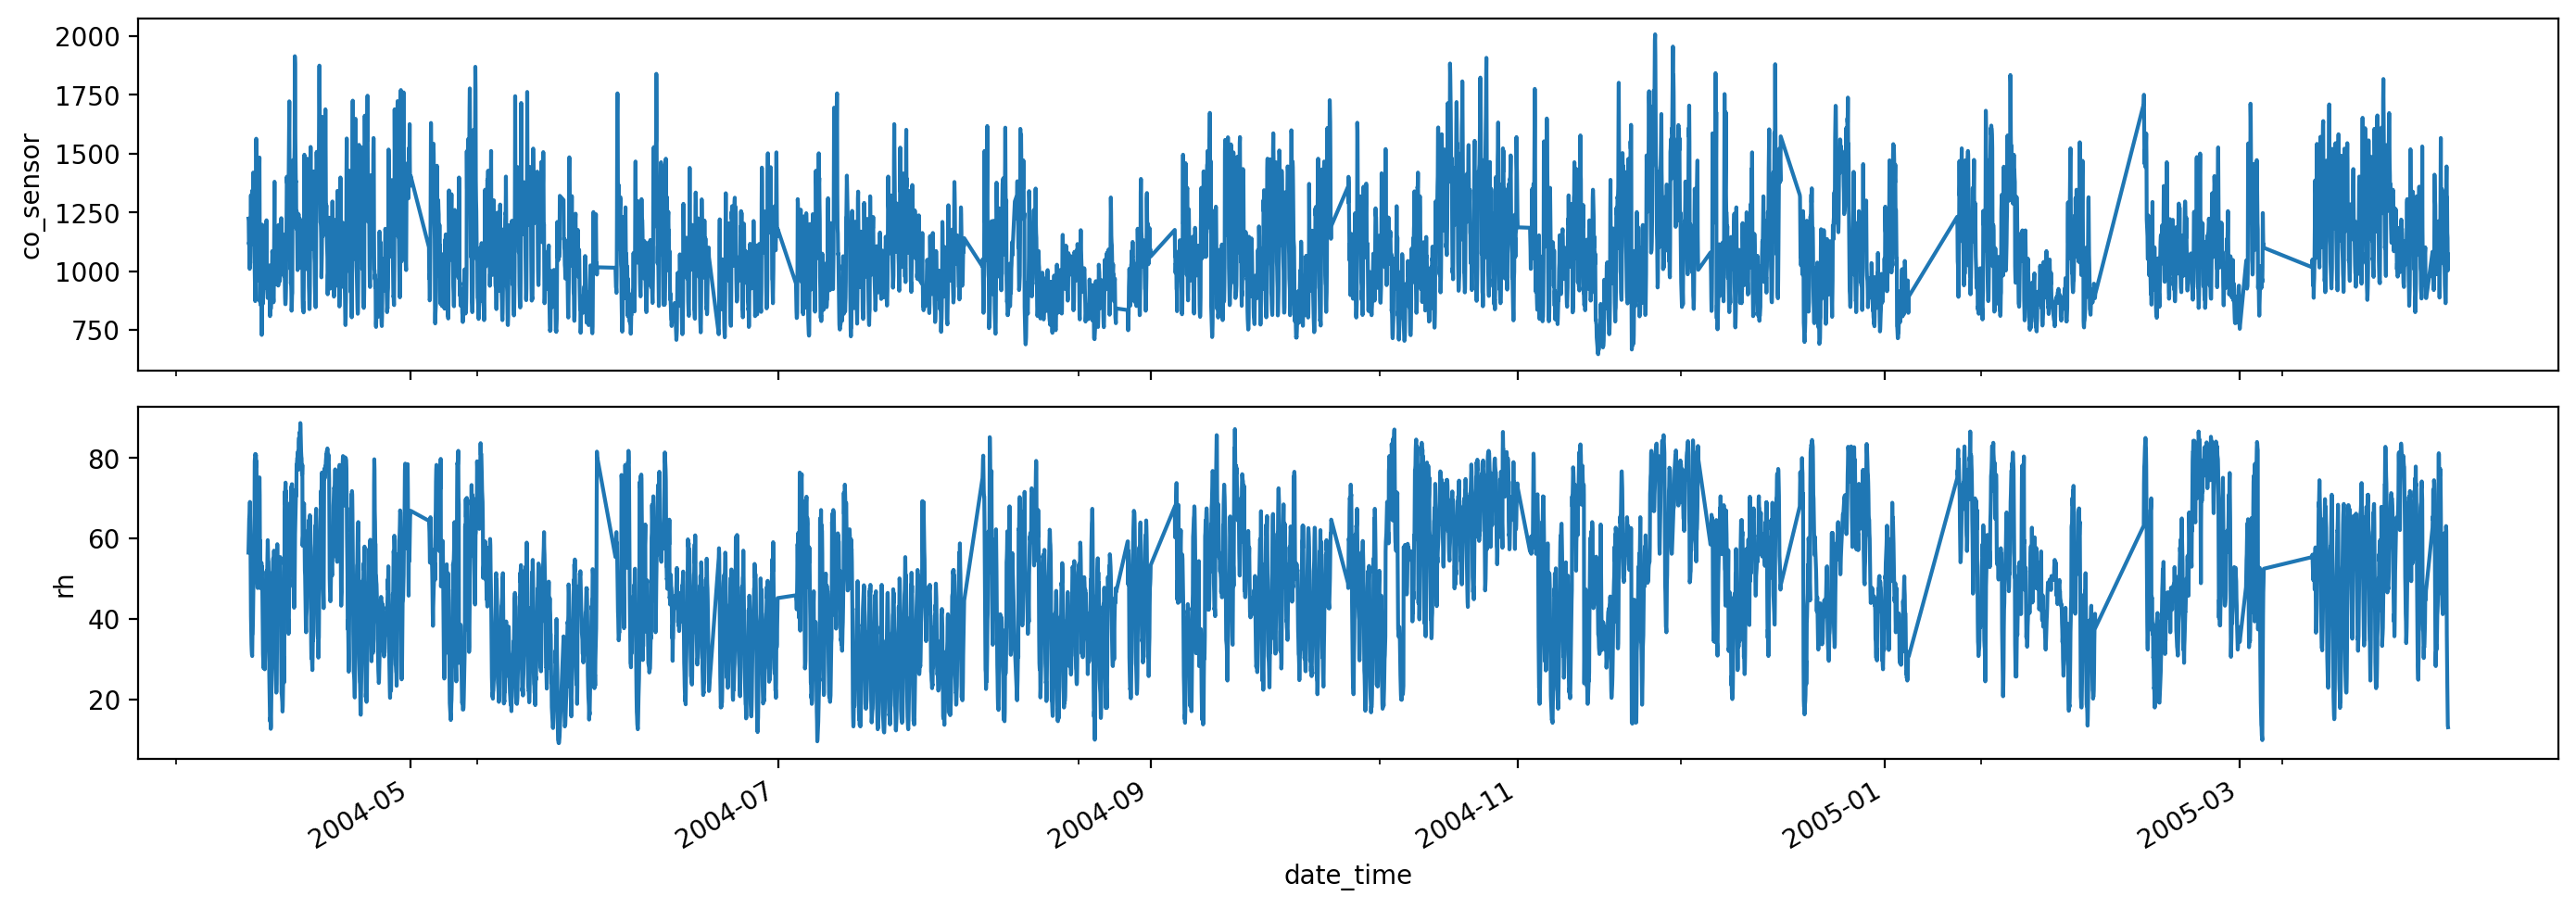

In [39]:
_, axs = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
for var, ax in zip(variables, axs):
    df[var].plot(ax=ax)
    ax.set_ylabel(var)
plt.tight_layout()

In [26]:
df.loc[x"2004-04-04":"2005-04-04"]

,date_time,co_true,co_sensor,nmhc_true,c6h6_true,nmhc_sensor,nox_true,nox_sensor,no2_true,no2_sensor,o3_sensor,t,rh,ah
date_time,,,,,,,,,,,,,,
2004-04-04 00:00:00,2004-04-04 00:00:00,-200.0,1224.0,-200.0,7.8,892.0,-200.0,884.0,-200.0,1580.0,923.0,16.7,56.5,1.0634
2004-04-04 01:00:00,2004-04-04 01:00:00,-200.0,1215.0,-200.0,6.7,843.0,-200.0,929.0,-200.0,1551.0,862.0,15.9,59.2,1.0635
2004-04-04 02:00:00,2004-04-04 02:00:00,-200.0,1115.0,-200.0,5.4,782.0,-200.0,980.0,-200.0,1500.0,752.0,15.2,62.4,1.0726
2004-04-04 03:00:00,2004-04-04 03:00:00,-200.0,1124.0,-200.0,5.6,793.0,-200.0,965.0,-200.0,1521.0,791.0,14.7,65.0,1.0766
2004-04-04 04:00:00,2004-04-04 04:00:00,-200.0,1028.0,-200.0,3.5,682.0,-200.0,1090.0,-200.0,1448.0,697.0,14.3,65.3,1.0594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [14]:

cols = [
        'date_time',
        'co_true',
        'co_sensor',
        'nmhc_true',
        'c6h6_true',
        'nmhc_sensor',
        'nox_true',
        'nox_sensor',
        'no2_true',
        'no2_sensor',
        'o3_sensor',
        't',
        'rh',
        'ah',
    ]


{c: c_new for c, c_new in zip(df.columns, cols)}

{'Date_Time': 'date_time',
 'CO(GT)': 'co_true',
 'PT08.S1(CO)': 'co_sensor',
 'NMHC(GT)': 'nmhc_true',
 'C6H6(GT)': 'c6h6_true',
 'PT08.S2(NMHC)': 'nmhc_sensor',
 'NOx(GT)': 'nox_true',
 'PT08.S3(NOx)': 'nox_sensor',
 'NO2(GT)': 'no2_true',
 'PT08.S4(NO2)': 'no2_sensor',
 'PT08.S5(O3)': 'o3_sensor',
 'T': 't',
 'RH': 'rh',
 'AH': 'ah'}

In [13]:
df.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [10]:


def process_air_quality(file_path:Path) -> pd.DataFrame:
    """
    Process air quality data

    The dataset was collected between January 2004 and March 2005.
    It consists of hourly measurements of the different air pollutants, NO2, NOX, CO, C6H6, O3 and NMHC. The measurements are accompanied by local temperature and humidity values, also recorded hourly.
    In the data collection experiments, scientists were testing new pollutant sensors. The values from the new sensors are stored in the variables called _sensors. 
    For comparison, data for the pollutants was also gathered from fixed stations, that regularly measure the concentration of these gases. Those values are stored in the variables called _true.
    """

    df = pd.read_csv(file_path, sep=";",parse_dates=[['Date', 'Time']]).iloc[:, :-2]
    df = df.dropna()

    new_var_names = [
        'Date_Time',
        'CO_true',
        'CO_sensor',
        'NMHC_true',
        'C6H6_true',
        'NMHC_sensor',
        'NOX_true',
        'NOX_sensor',
        'NO2_true',
        'NO2_sensor',
        'O3_sensor',
        'T',
        'RH',
        'AH',
    ]
    df.columns = new_var_names

    predictors = df.columns[1:]

    for var in predictors:
        if df[var].dtype !='O':
            continue
        df[var] = df[var].str.replace(',', '.')
        df[var] = pd.to_numeric(df[var])

    df[df['Date_Time'].apply(lambda x: len(x))>19]
    df['Date_Time'] = df['Date_Time'].str.replace('.', ':', regex=True)
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    return df.sort_index()




,Date_Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


,sunspot_number
date,
1749-01,96.7
1749-02,104.3
1749-03,116.7
1749-04,92.8
1749-05,141.7


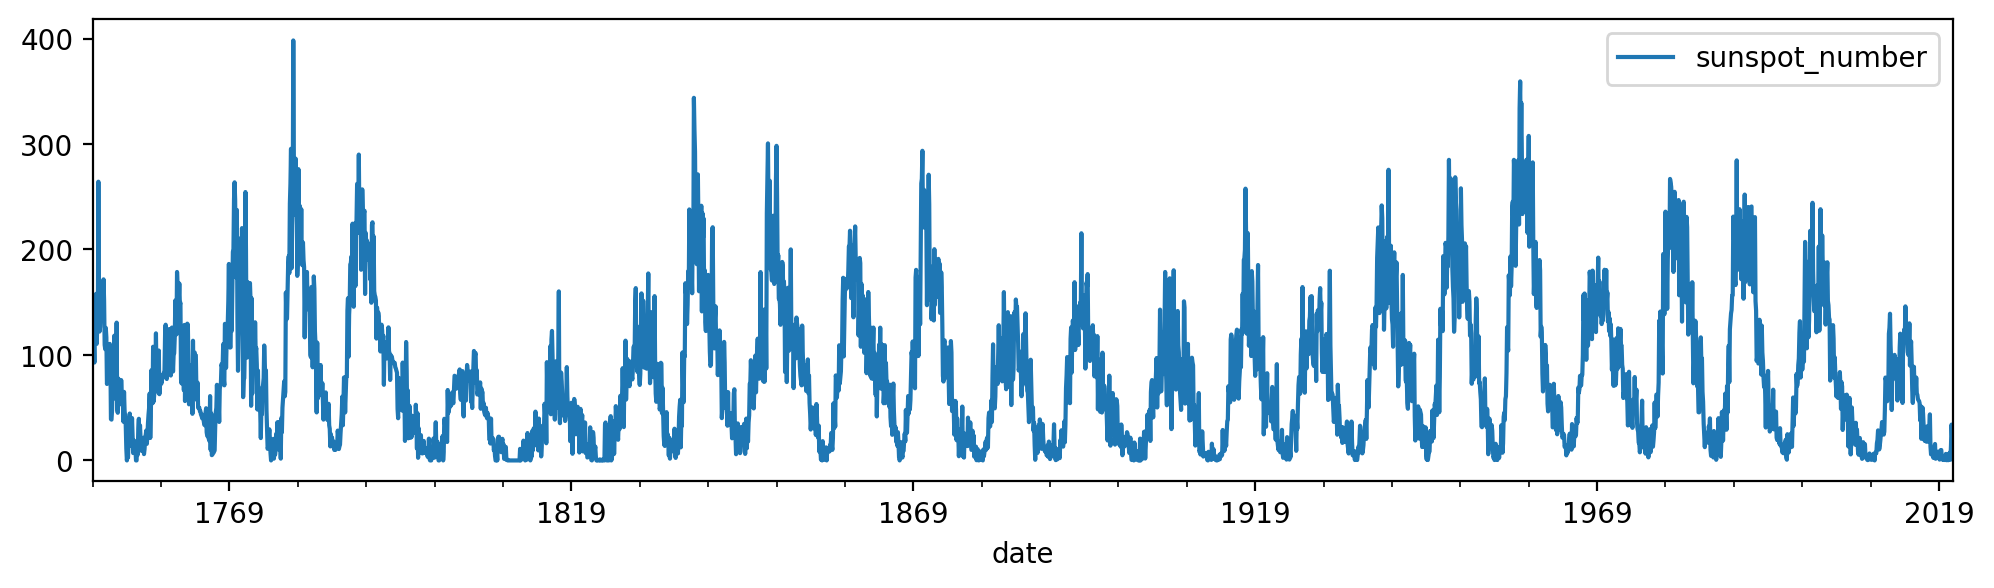

In [55]:
df = pd.read_parquet(DATA_DIR / "sunspots.parquet")
df["date"] = df["date"].dt.to_period('M')
df = df.set_index("date")

_, ax = plt.subplots(1,1, figsize=(12, 3))
_ = df.plot(ax=ax)
df.head()

<img src="../images/sunspot.gif" width="100">

## What is forecasting?
* Predicting future values of a time series through values and events in the past and present, e.g.

## Forecasting vs. supervised machine learning
#### Supervised learning &#x1F440; 
* We know the values of predictor variables &#x2705; 
* We assume that future data looks the same as past data &#x2705; 
#### Forecasting &#x1F4C8; 
* We often don't know the values of predictor variables &#x274C;
* Sometimes we don't even have predictors &#x274C;
* Time series are dynamic: distributions change! &#x274C;



## Forecasting modelling approach
```mermaid
graph TD
Z(Forecasting) --> A(Specialised<br/>models)
Z(Forecasting) --> B(Off-the-shelf<br/>algorithms)
A --> C(Exponential smoothing,<br/>ARIMA)
A --> D(Prophet)
A --> E(Recursive NNs)
A --> EE(...)
B --> F(Linear regression)
B --> G(Decision trees)
B --> H(...)
```

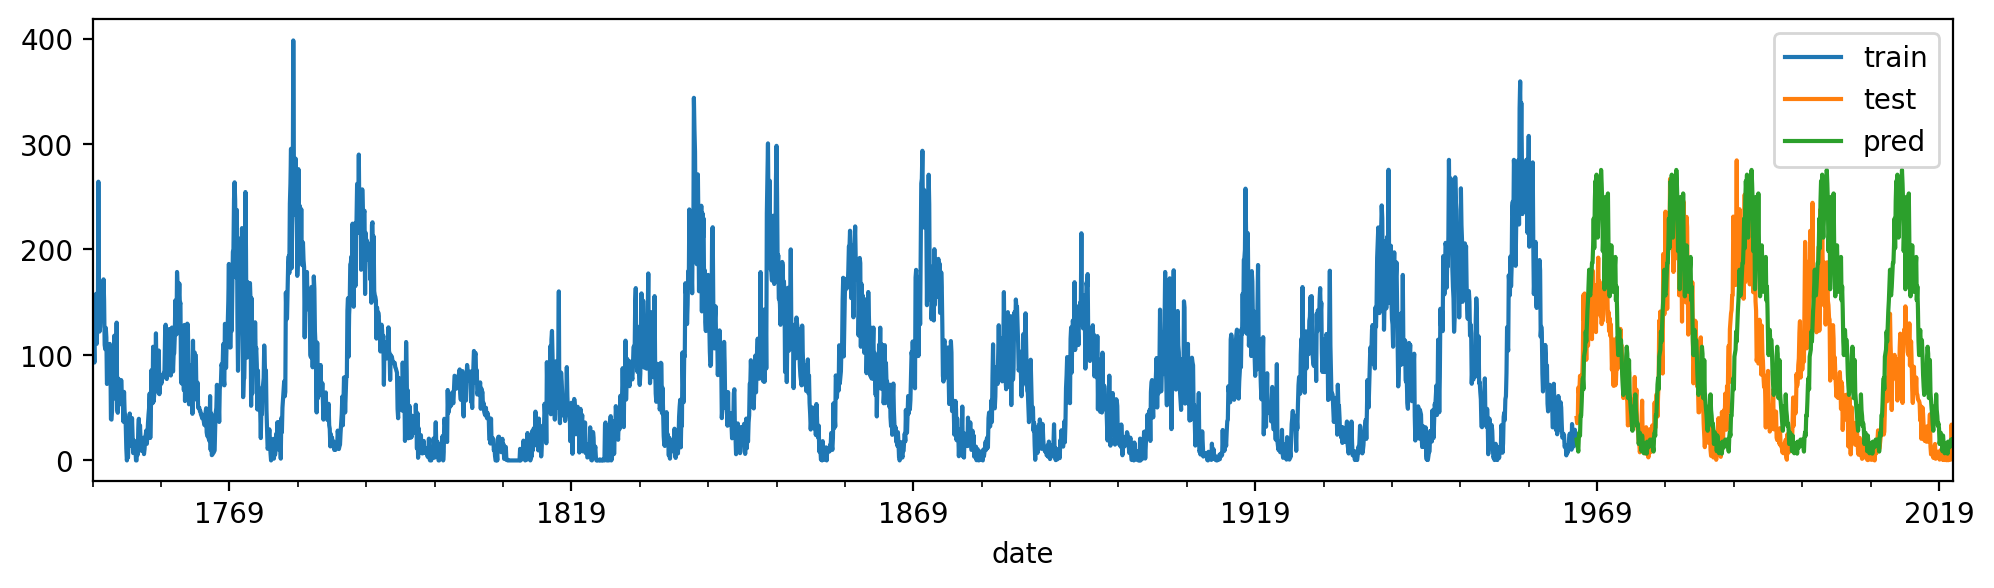

In [56]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

SPLIT_DATE = "1966-01-01"

df_train = df[df.index < SPLIT_DATE]
df_test = df[df.index >= SPLIT_DATE]

model = NaiveForecaster(strategy="mean",window_length=12*11*2, sp=12*11)
model.fit(df_train)

df_pred = model.predict(ForecastingHorizon(df_test.index, is_relative=False))

_, ax = plt.subplots(1,1, figsize=(12, 3))
_ = df_train.plot(ax=ax)
_ = df_test.plot(ax=ax)
_ = df_pred.plot(ax=ax)
_ = plt.legend(["train", "test", "pred"])